In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import torch
from torchvision.datasets import ImageFolder
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai

AttributeError: module 'torch' has no attribute 'no_grad'

In [3]:
import os
data_dir = '/kaggle/input/asl-alphabet' 
os.chdir(data_dir)

In [4]:
path = Path('/kaggle/input/asl-alphabet/asl_alphabet_train/')
path

Path('/kaggle/input/asl-alphabet/asl_alphabet_train')

In [5]:
sign=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.15,seed=42),
    get_y=parent_label,
    item_tfms=None,
    batch_tfms=None)

In [6]:
dls.vocab



NameError: name 'dls' is not defined

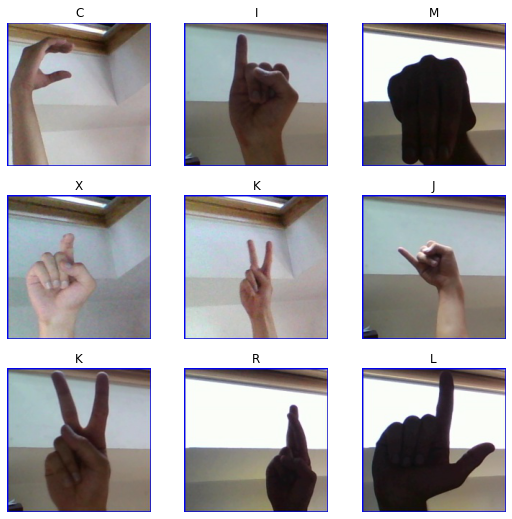

In [7]:
dls=sign.dataloaders(path)
dls.show_batch()

In [8]:
learn=cnn_learner(dls,resnet18,metrics=[error_rate,accuracy])
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.135533,0.045322,0.014406,0.985594,06:49


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.022871,0.007093,0.002069,0.997931,04:00
1,0.000309,0.000052,0.000000,1.000000,04:01


SuggestedLRs(lr_min=6.918309622960805e-08, lr_steep=2.0892961401841603e-05)

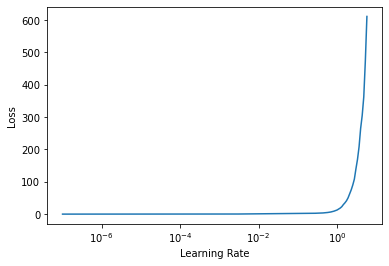

In [9]:
learn.path=Path('/')
learn.lr_find(stop_div=False, num_it=200)

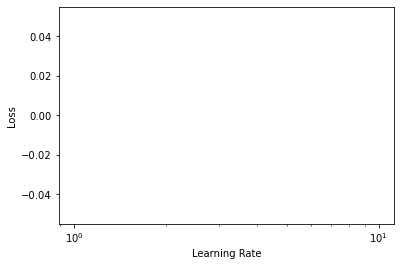

In [10]:
learn.recorder.lr_find()

In [11]:
learn.fit_one_cycle(3,lr_min=0.00012022644514217973, lr_steep=0.001318256719969213)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.049458,0.209564,0.065364,0.934636,04:02
1,0.003492,0.002225,0.000460,0.999540,04:02
2,0.000348,0.000024,0.000000,1.000000,04:01


In [12]:
learn.export(fname = Path("/kaggle/working/res18.pkl"))

In [13]:
learn_inf = load_learner("/kaggle/working/res18.pkl")

btn_upload = widgets.FileUpload()#Displays a widget which can be used to upload images from your system
btn_upload

FileUpload(value={}, description='Upload')

In [14]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(200,200))#resizes the uloaded image
out_pl

IndexError: list index out of range

In [15]:
pred,pred_idx,probs = learn_inf.predict('/kaggle/input/asl-alphabet-test/A/A0001_test.jpg')#asks the model to predict the animal in the image!

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred

Label(value='Prediction: T; Probability: 0.5295')

In [16]:
test_path=Path('/kaggle/input/asl-alphabet-test/')
test=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(200,200),
    batch_tfms=None)


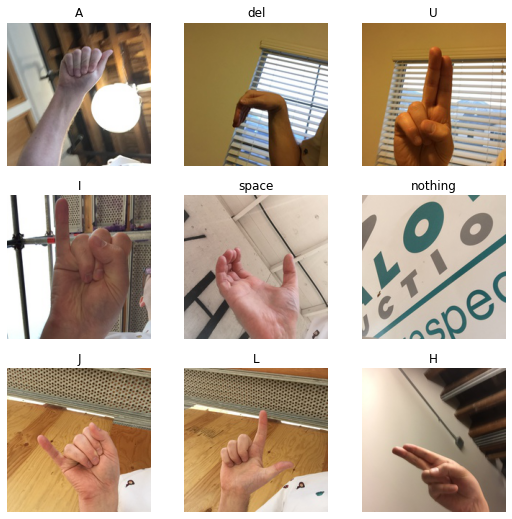

In [17]:
test_dls=test.dataloaders(test_path)
test_dls.show_batch()

In [18]:
learner = load_learner(fname=Path('/kaggle/input/pkl-file/res34 (1).pkl'))
tpred_idx =learn.predict(test_dls)

AssertionError: Expected an input of type in 
  - <class 'pathlib.PosixPath'>
  - <class 'pathlib.Path'>
  - <class 'str'>
  - <class 'torch.Tensor'>
  - <class 'numpy.ndarray'>
  - <class 'bytes'>
  - <class 'fastai.vision.core.PILImage'>
 but got <class 'fastai.data.core.DataLoaders'>

In [19]:
?learn.get_preds()

Object `learn.get_preds()` not found.
